In [ ]:
import numpy as np # for mathematical calculations
import pandas as pd
from datetime import datetime # to access datetime

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # for interactive plotting
import plotly.graph_objects as go # for interactive plotting
from wordcloud import WordCloud # for word cloud
%matplotlib inline

# for LDA
from gensim import corpora
from gensim.models import LdaModel

# for modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm

# warnings
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')

path = '/content/drive/My Drive/DSO 560/Project/Data'

In [ ]:
# Define the CSV file path
csv_file = 'CA_clean_data.csv'

# Read csv data
data = pd.read_csv(os.path.join(path, csv_file))
data

,name,state,restaurant_stars,review_count,attributes,categories,user_stars,useful,funny,cool,text,date,tokens,sentiment
0,Helena Avenue Bakery,CA,4.0,389.0,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': ""...","Food, Restaurants, Salad, Coffee & Tea, Breakf...",5.0,0.0,0.0,0.0,What a great addition to the Funk Zone! Grab ...,2016-10-13 22:50:47,"['great', 'addit', 'funk', 'zone', 'grab', 'bi...",0.8481
1,Helena Avenue Bakery,CA,4.0,389.0,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': ""...","Food, Restaurants, Salad, Coffee & Tea, Breakf...",5.0,0.0,0.0,0.0,Possibly the best breakfast sandwich EVER. On...,2017-01-15 00:36:04,"['possibl', 'best', 'breakfast', 'sandwich', '...",0.7964
2,Helena Avenue Bakery,CA,4.0,389.0,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': ""...","Food, Restaurants, Salad, Coffee & Tea, Breakf...",4.0,0.0,0.0,0.0,Pricey ( a ham and cheese croissant was $5.50)...,2018-07-17 00:20:41,"['pricey', 'ham', 'chees', 'croissant', 'anywh...",0.8910
3,Helena Avenue Bakery,CA,4.0,389.0,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': ""...","Food, Restaurants, Salad, Coffee & Tea, Breakf...",5.0,0.0,1.0,1.0,Are you kidding me? This is without a doubt so...,2018-01-09 20:44:47,"['kid', 'without', 'doubt', 'best', 'food', 'e...",0.7829
4,Helena Avenue Bakery,CA,4.0,389.0,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': ""...","Food, Restaurants, Salad, Coffee & Tea, Breakf...",2.0,3.0,0.0,0.0,"Super slow service, ""salads"" are not very good...",2017-02-09 19:09:31,"['super', 'slow', 'servic', 'salad', 'good', '...",0.7783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167693,Kyle's Isla Vista,CA,2.5,12.0,"{'OutdoorSeating': 'True', 'BusinessAcceptsBit...","Restaurants, Burgers, Food, Ice Cream & Frozen...",1.0,5.0,0.0,0.0,I was pretty stoked when Kyle's kitchen replac...,2020-11-20 03:25:38,"['pretti', 'stoke', 'kyle', 'kitchen', 'replac...",0.8979
167694,Kyle's Isla Vista,CA,2.5,12.0,"{'OutdoorSeating': 'True', 'BusinessAcceptsBit...","Restaurants, Burgers, Food, Ice Cream & Frozen...",2.0,0.0,0.0,0.0,"Ordered via doordash, about 7:50pm was tired s...",2021-03-22 04:22:52,"['order', 'via', 'doordash', 'tire', 'wife', '...",0.8779
167695,Kyle's Isla Vista,CA,2.5,12.0,"{'OutdoorSeating': 'True', 'BusinessAcceptsBit...","Restaurants, Burgers, Food, Ice Cream & Frozen...",1.0,0.0,0.0,0.0,I've been eating at and supporting the SIlverg...,2021-11-19 23:29:33,"['eat', 'support', 'silvergreen', 'famili', 'r...",0.7783
167696,Kyle's Isla Vista,CA,2.5,12.0,"{'OutdoorSeating': 'True', 'BusinessAcceptsBit...","Restaurants, Burgers, Food, Ice Cream & Frozen...",1.0,0.0,0.0,0.0,i LOVE burgers and the burgers from this kyles...,2020-12-01 02:47:52,"['love', 'burger', 'burger', 'kyle', 'realli',...",0.7579


### Gensim

In [ ]:
dictionary = corpora.Dictionary(data['tokens'].apply(lambda x: x.split()))
dictionary

In [ ]:
corpus = [dictionary.doc2bow(review) for review in data['tokens'].apply(lambda x: x.split())]

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, random_state=42)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return coherence_values

In [ ]:
# Compute coherence values
limit=20; start=2; step=2;
coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=data['tokens'].apply(lambda x: x.split()), start=start, limit=limit, step=step)

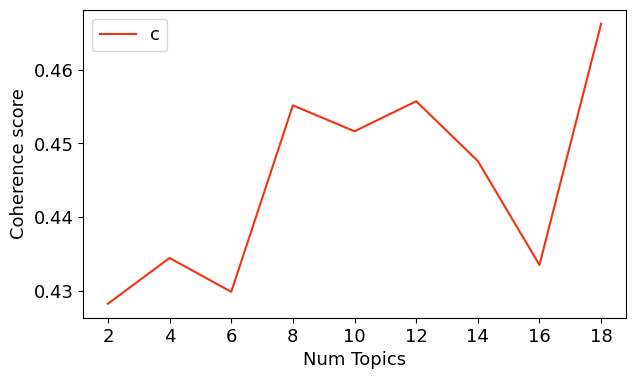

In [ ]:
# Plot
f, ax = plt.subplots(figsize=(7, 4))
plt.rcParams.update({'font.size': 13})
x = range(start, limit, step)
plt.plot(x, coherence_values, color='#f43212')
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Train an LDA model
lda_model = LdaModel(corpus, id2word=dictionary, num_topics=18, random_state=42)

# Print topics
for idx, topic in lda_model.print_topics(num_words=20):
    print(f'Topic: {idx} \nWords: {topic}')

Topic: 0 
Words: 0.023*"'place'," + 0.016*"'seat'," + 0.015*"'park'," + 0.014*"'get'," + 0.011*"'beach'," + 0.011*"'locat'," + 0.011*"'street'," + 0.010*"'outsid'," + 0.010*"'area'," + 0.010*"'tabl'," + 0.009*"'wait'," + 0.009*"'good'," + 0.009*"'right'," + 0.009*"'nice'," + 0.008*"'walk'," + 0.008*"'insid'," + 0.008*"'littl'," + 0.008*"'around'," + 0.008*"'sit'," + 0.007*"'state',"
Topic: 1 
Words: 0.078*"'burrito'," + 0.059*"'mexican'," + 0.030*"'food'," + 0.024*"'lo'," + 0.021*"'breakfast'," + 0.019*"'de'," + 0.019*"'authent'," + 0.017*"'best'," + 0.016*"'get'," + 0.015*"'place'," + 0.015*"'la'," + 0.011*"'bean'," + 0.010*"'line'," + 0.009*"'joe'," + 0.009*"'good'," + 0.009*"'long'," + 0.007*"['best'," + 0.007*"'town'," + 0.007*"'con'," + 0.007*"'wait',"
Topic: 2 
Words: 0.028*"'order'," + 0.021*"'food'," + 0.020*"'ask'," + 0.018*"'wait'," + 0.016*"'servic'," + 0.016*"'time'," + 0.014*"'minut'," + 0.013*"'get'," + 0.013*"'tabl'," + 0.012*"'said'," + 0.011*"'came'," + 0.010*"'back',"

In [ ]:
coherence_score = CoherenceModel(model=lda_model, texts=data['tokens'].apply(lambda x: x.split()), dictionary=dictionary, coherence='c_v')
coherence_score.get_coherence()

0.46625470726148344

In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.7 MB/s eta 0:00:00


In [ ]:
import pyLDAvis.gensim
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

optimal_model = lda_model  # This is a simplification; in practice, you'd look for the "elbow"
vis = gensimvis.prepare(optimal_model, corpus, dictionary,sort_topics=False)
pyLDAvis.display(vis)

In [ ]:
#map the reviews data to the model, v is the reviews transformed to word vectors by doc2bow
m = lda_model[corpus[0:len(corpus)]]

#assign topic to each review
import operator
topic = []
for x in m:
    #find the topic with the highest proportions
    t = max(x, key = operator.itemgetter(1))
    topic.append(t[0])

In [ ]:
#map topic names to the topic numbers
topic_dict = {0:'Location', 1:'Food', 2:'Time',
             3:'Food', 4:'Food', 5:'Food',
             6:'Service', 7:'Food', 8:'Location', 9:'Food', 10:'Food', 11:'Service', 12:'Food', 13:'Food', 14:'Service', 15:'Service', 16:'Food', 17:'Food'}

In [ ]:
main_topic = [topic_dict[topic_no] for topic_no in topic]

In [ ]:
data['topic'] = main_topic

In [ ]:
data['topic_no'] = topic

In [ ]:
data.head(5)

,name,state,restaurant_stars,review_count,attributes,categories,user_stars,useful,funny,cool,text,date,tokens,sentiment,topic,topic_no
0,Helena Avenue Bakery,CA,4.0,389.0,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': ""...","Food, Restaurants, Salad, Coffee & Tea, Breakf...",5.0,0.0,0.0,0.0,What a great addition to the Funk Zone! Grab ...,2016-10-13 22:50:47,"['great', 'addit', 'funk', 'zone', 'grab', 'bi...",0.8481,Location,0
1,Helena Avenue Bakery,CA,4.0,389.0,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': ""...","Food, Restaurants, Salad, Coffee & Tea, Breakf...",5.0,0.0,0.0,0.0,Possibly the best breakfast sandwich EVER. On...,2017-01-15 00:36:04,"['possibl', 'best', 'breakfast', 'sandwich', '...",0.7964,Food,17
2,Helena Avenue Bakery,CA,4.0,389.0,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': ""...","Food, Restaurants, Salad, Coffee & Tea, Breakf...",4.0,0.0,0.0,0.0,Pricey ( a ham and cheese croissant was $5.50)...,2018-07-17 00:20:41,"['pricey', 'ham', 'chees', 'croissant', 'anywh...",0.8910,Service,11
3,Helena Avenue Bakery,CA,4.0,389.0,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': ""...","Food, Restaurants, Salad, Coffee & Tea, Breakf...",5.0,0.0,1.0,1.0,Are you kidding me? This is without a doubt so...,2018-01-09 20:44:47,"['kid', 'without', 'doubt', 'best', 'food', 'e...",0.7829,Service,14
4,Helena Avenue Bakery,CA,4.0,389.0,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': ""...","Food, Restaurants, Salad, Coffee & Tea, Breakf...",2.0,3.0,0.0,0.0,"Super slow service, ""salads"" are not very good...",2017-02-09 19:09:31,"['super', 'slow', 'servic', 'salad', 'good', '...",0.7783,Service,11


In [ ]:
overall_rating = data.groupby(['name'])['user_stars'].mean().reset_index()

In [ ]:
topic_rating = pd.DataFrame(data.groupby(['name','topic'])['sentiment'].mean()).reset_index()
topic_rating

,name,topic,sentiment
0,101 Deli,Food,0.778414
1,101 Deli,Location,0.635800
2,101 Deli,Service,0.805093
3,101 Deli,Time,0.746667
4,1114 Sports Bar & Games,Food,0.646475
...,...,...,...
2269,Zodo's Bowlero Bowling & Beyond,Time,0.232181
2270,Zookers Cafe,Food,0.728494
2271,Zookers Cafe,Location,0.779216
2272,Zookers Cafe,Service,0.778529


In [ ]:
topic_rating_pivot = topic_rating.pivot_table(index='name', columns='topic', values='sentiment', fill_value=None)
topic_rating_pivot

topic,Food,Location,Service,Time
name,,,,
101 Deli,0.778414,0.635800,0.805093,0.746667
1114 Sports Bar & Games,0.646475,0.831633,0.750635,0.478456
4 Eggs & Pizza,0.800600,0.746320,0.675623,0.993800
A Piece of Cake,0.947700,0.648525,0.284100,0.914450
A Slice of Woodstock's,0.933700,0.371500,0.721067,0.147700
...,...,...,...,...
Your Place Thai Restaurant,0.729169,0.676083,0.569081,0.397258
Zaytoon,0.747983,0.750399,0.759158,0.378075
Zen Yai Thai Cuisine,0.706128,0.718123,0.702624,0.548562


In [ ]:
topic_count = data['topic'].value_counts()
topic_count

topic
Service     71075
Food        48090
Location    26206
Time        22327
Name: count, dtype: int64

In [ ]:
import plotly.express as px

fig = px.pie(values=topic_count.values, names=topic_count.index, color=topic_count.index,
             color_discrete_map={'Service':'#f43212',
                                 'Food':'#f4ccccff',
                                 'Location':'#2d2e2f',
                                 'Time':'#c8c9ca'})
fig.show()

In [ ]:
aggregate_data = data.groupby('name')[['sentiment', 'user_stars']].mean()
aggregate_data

,sentiment,user_stars
name,,
101 Deli,0.767979,4.607143
1114 Sports Bar & Games,0.703075,3.938356
4 Eggs & Pizza,0.737854,4.819672
A Piece of Cake,0.565933,2.083333
A Slice of Woodstock's,0.615080,3.800000
...,...,...
Your Place Thai Restaurant,0.661548,3.857143
Zaytoon,0.715333,4.173547
Zen Yai Thai Cuisine,0.693405,3.897727


In [ ]:
topic_data = topic_rating_pivot.merge(aggregate_data, on='name')
topic_data

,Food,Location,Service,Time,sentiment,user_stars
name,,,,,,
101 Deli,0.778414,0.635800,0.805093,0.746667,0.767979,4.607143
1114 Sports Bar & Games,0.646475,0.831633,0.750635,0.478456,0.703075,3.938356
4 Eggs & Pizza,0.800600,0.746320,0.675623,0.993800,0.737854,4.819672
A Piece of Cake,0.947700,0.648525,0.284100,0.914450,0.565933,2.083333
A Slice of Woodstock's,0.933700,0.371500,0.721067,0.147700,0.615080,3.800000
...,...,...,...,...,...,...
Your Place Thai Restaurant,0.729169,0.676083,0.569081,0.397258,0.661548,3.857143
Zaytoon,0.747983,0.750399,0.759158,0.378075,0.715333,4.173547
Zen Yai Thai Cuisine,0.706128,0.718123,0.702624,0.548562,0.693405,3.897727


In [ ]:
topic_data.isnull().sum()

Food          10
Location      16
Service        3
Time          49
sentiment      0
user_stars     0
dtype: int64

In [ ]:
# Dictionary mapping old column names to new column names
new_column_names = {
    'name': 'name',
    'Food': 'food',
    'Location': 'location',
    'Service': 'service',
    'Time': 'time',
    'sentiment':'overall',
    'user_stars':'stars_rating'
}

# Rename the columns
topic_data.rename(columns=new_column_names, inplace=True)

<Axes: >

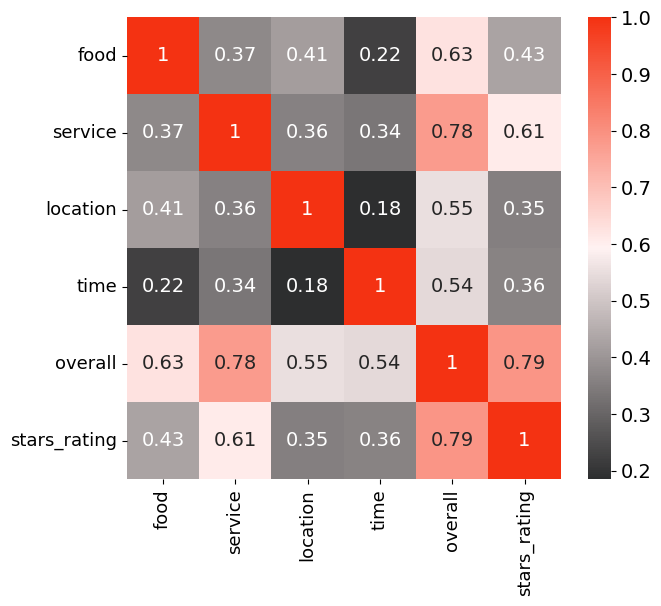

In [ ]:
import matplotlib.colors
# Compute the correlation matrix
corr = topic_data[[ 'food', 'service','location','time','overall','stars_rating']].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 6))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# cmap = sns.palplot(sns.color_palette("Red",12))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#2d2e2f","#FFF2F2","#f43212"])
plt.rcParams.update({'font.size': 14})  # Set font size as required

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, annot=True)

# Linear Regression

In [ ]:
X_rating = topic_data[['overall']]

In [ ]:
X_train, y_train = topic_data[['food', 'service','location','time']], topic_data[['stars_rating']]

In [ ]:
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=2, weights="uniform")
imp = imp.fit(X_train.values)
imputed_data = imp.transform(X_train.values)
imputed_data

array([[0.77841429, 0.80509286, 0.6358    , 0.74666667],
       [0.646475  , 0.75063506, 0.83163333, 0.478456  ],
       [0.8006    , 0.67562333, 0.74632   , 0.9938    ],
       ...,
       [0.70612778, 0.70262381, 0.71812308, 0.54856207],
       [0.7269    , 0.73015741, 0.79054062, 0.2321807 ],
       [0.72849417, 0.77852867, 0.77921628, 0.54449394]])

In [ ]:
X_train_imputed = pd.DataFrame(imputed_data, columns=X_train.columns)
X_train_imputed

,food,service,location,time
0,0.778414,0.805093,0.635800,0.746667
1,0.646475,0.750635,0.831633,0.478456
2,0.800600,0.675623,0.746320,0.993800
3,0.947700,0.284100,0.648525,0.914450
4,0.933700,0.721067,0.371500,0.147700
...,...,...,...,...
583,0.729169,0.569081,0.676083,0.397258
584,0.747983,0.759158,0.750399,0.378075
585,0.706128,0.702624,0.718123,0.548562
586,0.726900,0.730157,0.790541,0.232181


In [ ]:
X_train_imputed.isnull().sum()

food        0
service     0
location    0
time        0
dtype: int64

In [ ]:
lr = LinearRegression()

# Perform cross-validation with accuracy scoring
lr_CV = cross_val_score(lr, X_rating, y_train, cv = kfolds)

print("Linear Regression: \n")
print("Mean R2 of 10-folds:", np.mean(lr_CV))

Linear Regression: 

Mean R2 of 10-folds: 0.5964125064824028


In [ ]:
kfolds = KFold(n_splits = 10, random_state = 1, shuffle = True)

lr = LinearRegression()

# Perform cross-validation with accuracy scoring
lr_CV = cross_val_score(lr, X_train_imputed, y_train, cv = kfolds)

print("Linear Regression: \n")
print("Mean R2 of 10-folds:", np.mean(lr_CV))

Linear Regression: 

Mean R2 of 10-folds: 0.3627466596106493


In [ ]:
lr = LinearRegression()

# Perform cross-validation with accuracy scoring
lr_CV = cross_val_score(lr, X_train_imputed[['food']], y_train, cv = kfolds)

print("Linear Regression: \n")
print("Mean R2 of 10-folds:", np.mean(lr_CV))

Linear Regression: 

Mean R2 of 10-folds: 0.15224389677588013


In [ ]:
lr = LinearRegression()

# Perform cross-validation with accuracy scoring
lr_CV = cross_val_score(lr, X_train_imputed[['service']], y_train, cv = kfolds)

print("Linear Regression: \n")
print("Mean R2 of 10-folds:", np.mean(lr_CV))

Linear Regression: 

Mean R2 of 10-folds: 0.3093400095478262


In [ ]:
lr = LinearRegression()

# Perform cross-validation with accuracy scoring
lr_CV = cross_val_score(lr, X_train_imputed[['time']], y_train, cv = kfolds)

print("Linear Regression: \n")
print("Mean R2 of 10-folds:", np.mean(lr_CV))

Linear Regression: 

Mean R2 of 10-folds: 0.08387346602218529


In [ ]:
lr = LinearRegression()

# Perform cross-validation with accuracy scoring
lr_CV = cross_val_score(lr, X_train_imputed[['location']], y_train, cv = kfolds)

print("Linear Regression: \n")
print("Mean R2 of 10-folds:", np.mean(lr_CV))

Linear Regression: 

Mean R2 of 10-folds: 0.10259475305807589


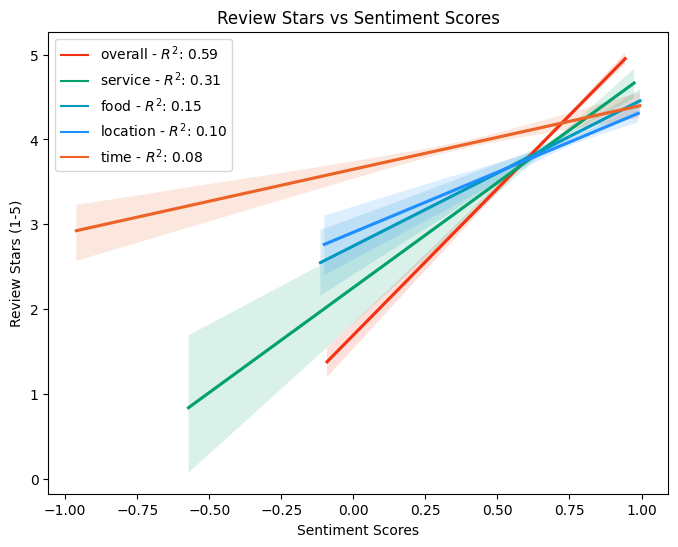

In [ ]:
from matplotlib.lines import Line2D

plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 10})  # Set font size as required

handles = []

overall_line = sns.regplot(data=topic_data, x='overall', y='stars_rating', color='#f43212', line_kws={'color': '#f43212'}, scatter=False)
service_line = sns.regplot(data=topic_data, x='service', y='stars_rating', line_kws={'color': '#02A16D'}, scatter=False)
food_line = sns.regplot(data=topic_data, x='food', y='stars_rating', line_kws={'color': '#0399BF'}, scatter=False)
location_line = sns.regplot(data=topic_data, x='location', y='stars_rating', line_kws={'color': '#1F8EFF'}, scatter=False)
time_line = sns.regplot(data=topic_data, x='time', y='stars_rating', line_kws={'color': '#EC6227'}, scatter=False)

# Create Line2D objects for legend handles
handles.append(Line2D([0], [0], color='#f43212'))
handles.append(Line2D([0], [0], color='#02A16D'))
handles.append(Line2D([0], [0], color='#0399BF'))
handles.append(Line2D([0], [0], color='#1F8EFF'))
handles.append(Line2D([0], [0], color='#EC6227'))

plt.title('Review Stars vs Sentiment Scores')
plt.xlabel('Sentiment Scores')
plt.ylabel('Review Stars (1-5)')

# Create the legend manually
plt.legend(handles=handles, labels=['overall - $R^{2}$: 0.59', 'service - $R^{2}$: 0.31', 'food - $R^{2}$: 0.15',
            'location - $R^{2}$: 0.10', 'time - $R^{2}$: 0.08'])

plt.show()